# Frequency Series Fitting (With Transfer Funtcion Part 1)

We follow the last tutorial and fit the typical LVDT noise with a transfer function.
The idea is to fit the amplitude spectral density firstly with an empirical model.
This is important because we can switch to logspace if we have the empirical model,
and with logspace data points, the fitting is generally smoother and can be done without
artificial weighting functions.

We divide the tutorial into two parts, we fist fit the LVDT noise with a zero-pole-gain (ZPK) model.
A zero-pole-gain model is not the most general model but it is useful as a stepping stone before a
general fractional polynomial model. With the ZPK model, we can use global optimization as the upper limits
of the zeros and poles are well defined by the frequency axis of the measurement. 
For now, the tool we present here is only capable of fitting transfer functions with equal number of poles and zeros so we only need to specify the order of the transfer function. Although we said it's
required to specify the system order, the final product will not necessarily be the same order as
we will present a mechanism for order reduction in Part 2 when we introduce the fractional polynomial model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import kontrol.common.math
import kontrol.core.frequency_series.noise_models
import kontrol.core.frequency_series.frequency_series  # We should be able to simple this to kontrol.FrequencySeries.

np.random.seed(123)

f = np.linspace(1e-2, 1e2, 1000)
lvdt_noise = kontrol.core.frequency_series.noise_models.lvdt_noise(f)
noisy_data_db = np.random.uniform(-1, 1, 1000)  # Some random noise between -1 and 1 dB.
lvdt_noise = lvdt_noise * 10**(noisy_data_db/20)

# We follow the Frequency Series Fitting Tutorial (With Empirical Model to fit the data.)
fs = kontrol.core.frequency_series.frequency_series.FrequencySeries(f=f, x=lvdt_noise)
model = kontrol.core.frequency_series.noise_models.lvdt_noise

res_empirical = fs.fit_empirical(model=model)
res_zpk = fs.fit_zpk(order=5, padding=True)



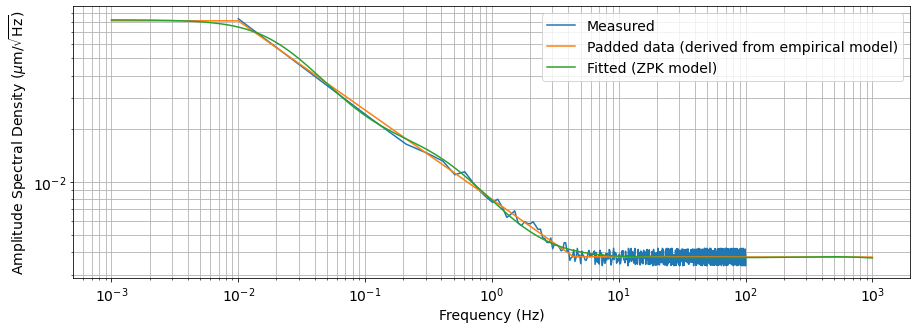

In [2]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(15,5))
plt.loglog(f, fs.x, label="Measured")
plt.loglog(fs._f_processed, fs._x_processed, label="Padded data (derived from empirical model)")
plt.loglog(fs.f_zpk, abs(fs.x_zpk), label="Fitted (ZPK model)")

plt.ylabel("Amplitude Spectral Density ($\mu\mathrm{m}/\sqrt{\mathrm{Hz}}$)")
plt.xlabel("Frequency (Hz)")
plt.legend(loc=0)
plt.grid(which="both")

In [3]:
import kontrol.core.frequency_series.conversion as conversion
zpk_control_tf = conversion.args2controltf(zpk_args=fs.args_zpk_model)
zpk_control_tf

TransferFunction(array([2.18584025e+09, 2.85709808e+13, 1.20443343e+17, 1.65920036e+20,
       2.23229454e+21, 1.34146473e+21]), array([6.13706663e+11, 7.70220082e+15, 3.19944913e+19, 4.40531167e+22,
       1.27034771e+23, 1.62430771e+22]))